In [1]:
import scanpy as sc
import scIB
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize']=(8,8)

In [3]:
root = "/storage/groups/ml01/workspace/group.daniela"

In [4]:
def rename_mammary(adata):
    adata.obs.tissue = ['Mammary' if x == 'Mammary_Gland' else x for x in adata.obs.tissue]

In [5]:
def add_cc_scores(adata_pre, adata_post):
    for key in ['phase', 'S_score', 'G2M_score']:
        adata_post.obs[key] = adata_pre.obs[key].tolist()

# Raw data

In [90]:
adata = sc.read(root+"/atlases_merged_anno_new.h5ad", cache=True)

In [91]:
adata

AnnData object with n_obs × n_vars = 133340 × 18756 
    obs: 'barcode', 'batch', 'cell_type', 'cell_type_union', 'channel', 'log_counts', 'marker_gene', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'sample_id', 'sex', 'size_factors', 'study', 'tissue'
    var: 'gene_ids-1-1'
    layers: 'counts'

In [14]:
#scIB.pp.reduce_data(adata, batch_key='study', n_top_genes=2000, use_rep='X_pca', pca=True, umap=True))

HVG
Using 353 HVGs from full intersect set
Using 912 HVGs from n_batch-1 set
Using 735 HVGs from n_batch-2 set
Using 2000 HVGs
Computed 2000 highly variable genes
PCA
Nearest Neigbours
UMAP


In [ ]:
adata.write(root + "/atlases_analysis/adata_merged_preprocessed.h5ad")

In [6]:
adata = sc.read(root + "/atlases_analysis/adata_merged_preprocessed.h5ad", cache=True)

In [7]:
rename_mammary(adata)

In [8]:
scIB.pp.score_cell_cycle(adata)

... storing 'tissue' as categorical
... storing 'phase' as categorical


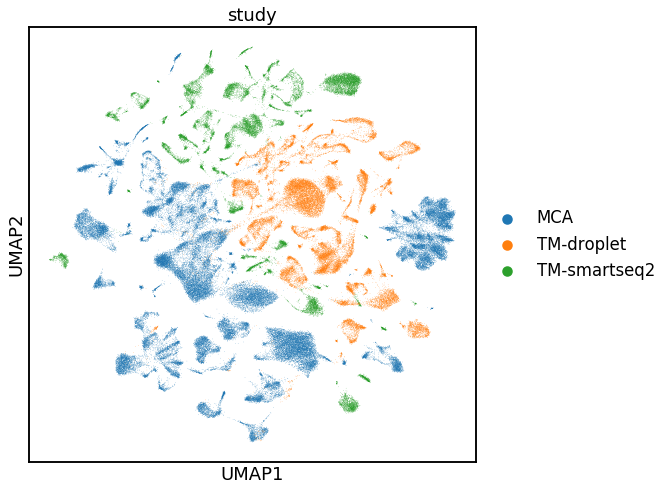

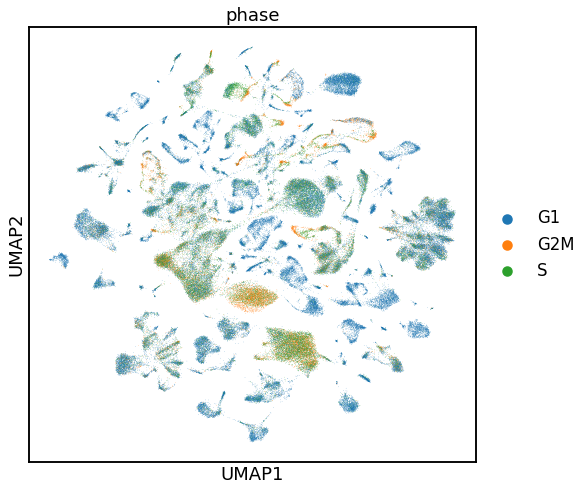

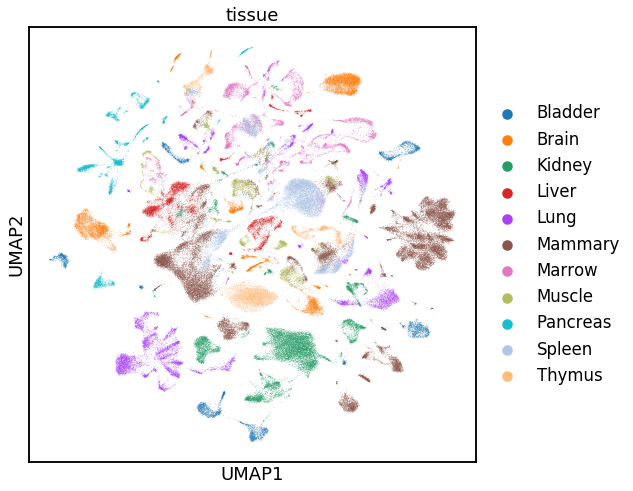

In [9]:
sc.pl.umap(adata, color=['study'])
sc.pl.umap(adata, color=['phase'])
sc.pl.umap(adata, color=['tissue'], palette=sc.pl.palettes.vega_20_scanpy)

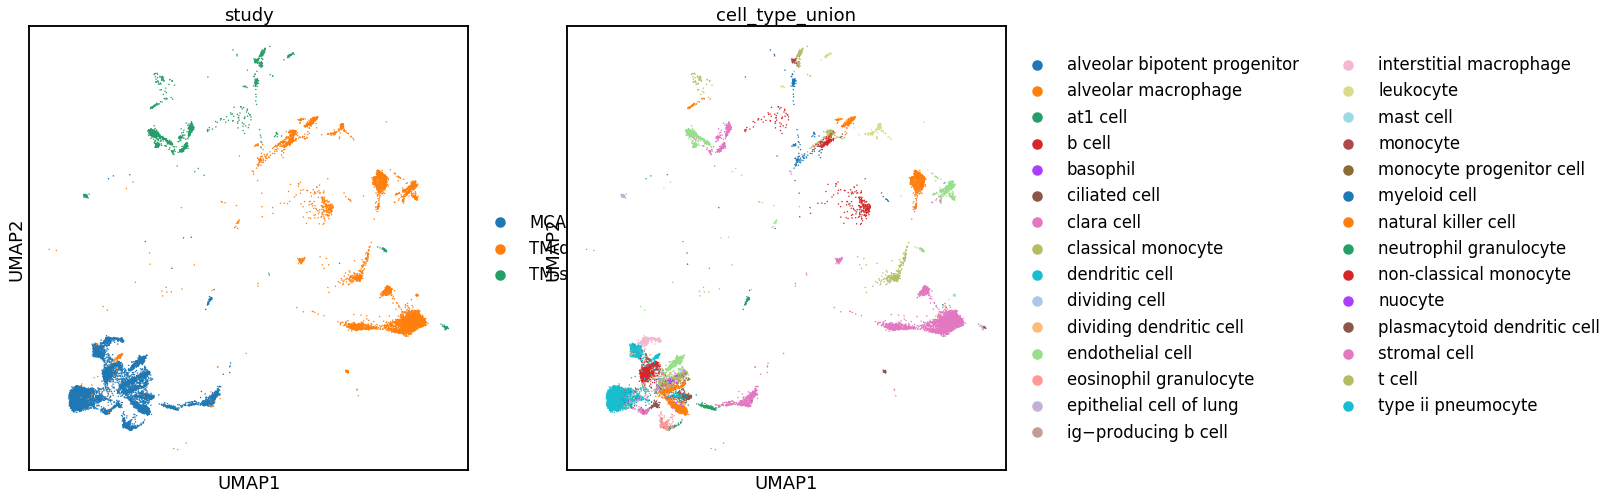

In [10]:
sc.pl.umap(adata[adata.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

# Integrated Data

## Scanorama

In [21]:
scanorama = sc.read(root+"/atlases_integrated/scanorama.h5ad", cache=True)

### Corrected expression matrix

In [18]:
scIB.pp.reduce_data(scanorama, n_top_genes=None, use_rep='X_pca', pca=True, umap=True)

PCA
Nearest Neigbours
UMAP


In [19]:
scanorama.write(root + "/atlases_analysis/scanorama_full.h5ad")

In [11]:
scanorama = sc.read(root + "/atlases_analysis/scanorama_full.h5ad")

In [12]:
rename_mammary(scanorama)
add_cc_scores(adata, scanorama)

In [13]:
cl = [x.split('-')[0] for x in scanorama.obs.index]
cl2 = [x.split('-')[0] for x in adata.obs.index]

In [14]:
cl == cl2

True

In [ ]:
scIB.me.pcr(adata, 'S_score', embed='X_pca', verbose=True)

covariate: S_score
PCR on embedding


In [ ]:
scIB.me.pcr(scanorama, 'S_score', embed='X_pca')

In [ ]:
sc.pl.umap(scanorama, color=['study'])
sc.pl.umap(scanorama, color=['phase'])

In [ ]:
sub = scanorama[scanorama.obs.tissue == 'Kidney']
sc.pl.umap(sub, color='study')
sc.pl.umap(sub, color='cell_type_union')
sc.pl.umap(sub, color='phase')

### Embedding

In [42]:
scanorama.obsm['X_pca'] = scanorama.obsm['X_emb']

In [43]:
scIB.pp.reduce_data(scanorama, n_top_genes=None, use_rep='X_emb', pca=False, umap=True)

Nearest Neigbours
UMAP


In [44]:
scanorama.write(root + "/atlases_analysis/scanorama_embed.h5ad")

In [49]:
scanorama_embed = sc.read(root + "/atlases_analysis/scanorama_embed.h5ad")

In [50]:
rename_mammary(scanorama_embed)
add_cc_scores(adata, scanorama_embed)

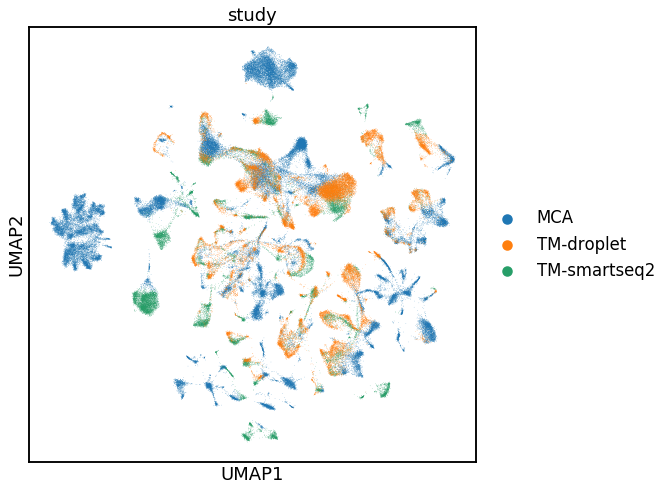

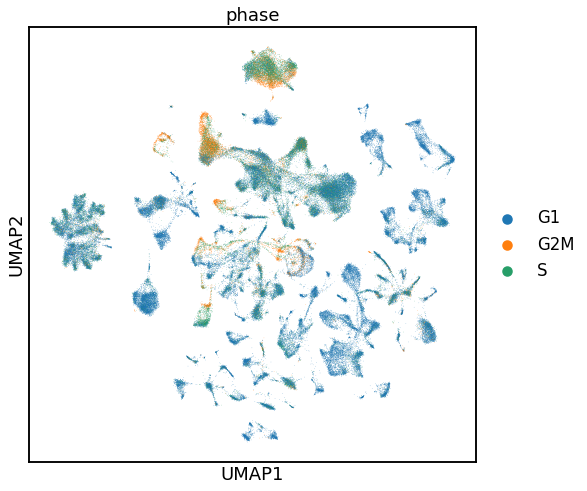

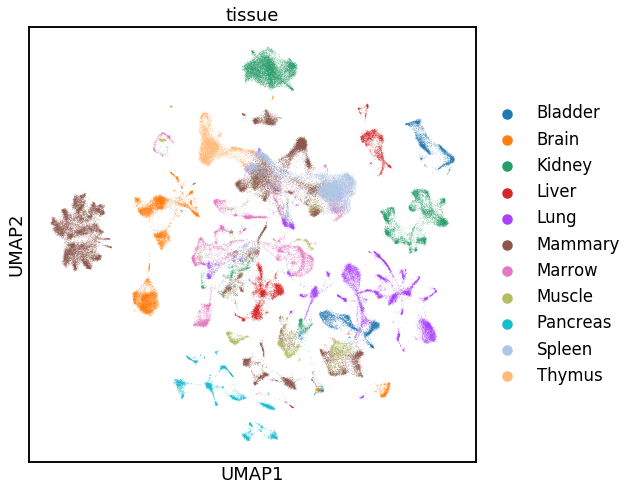

In [81]:
sc.pl.umap(scanorama_embed, color=['study'], palette = sc.pl.palettes.vega_20_scanpy)
sc.pl.umap(scanorama_embed, color='phase')
sc.pl.umap(scanorama_embed, color='tissue')

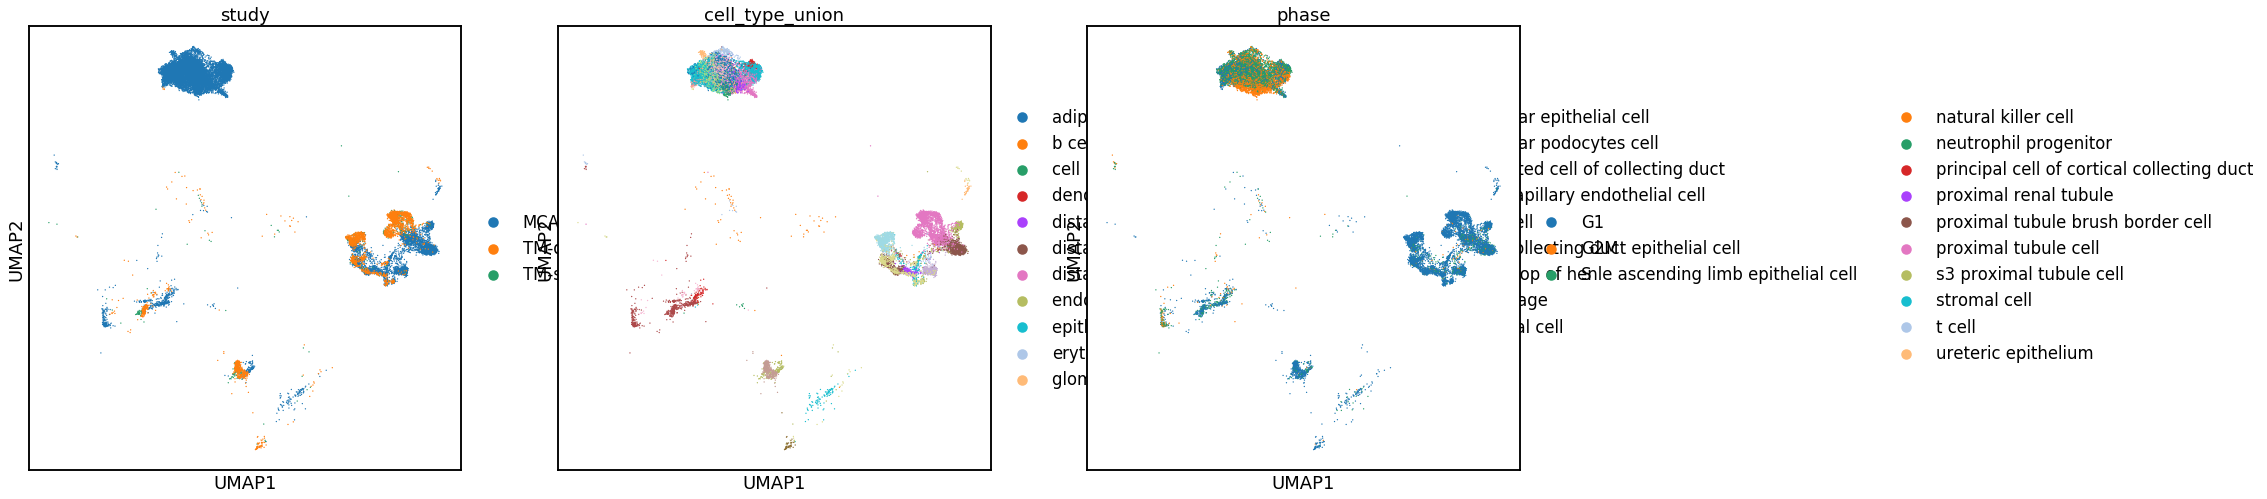

In [60]:
sc.pl.umap(scanorama_embed[scanorama_embed.obs.tissue == 'Kidney'], color=['study', 'cell_type_union', 'phase'], palette=sc.pl.palettes.vega_20_scanpy)

### BBKNN - kNN

In [7]:
bbknn = sc.read(root+"/atlases_integrated/bbknn.h5ad")

In [ ]:
scIB.pp.reduce_data(bbknn, n_top_genes=None, neighbors=False, pca=False, umap=True)

In [ ]:
bbknn.write(root + "/atlases_analysis/bbknn_knn.h5ad")

In [53]:
bbknn = sc.read(root + "/atlases_analysis/bbknn_knn.h5ad")

In [54]:
rename_mammary(bbknn)
add_cc_scores(adata, bbknn)

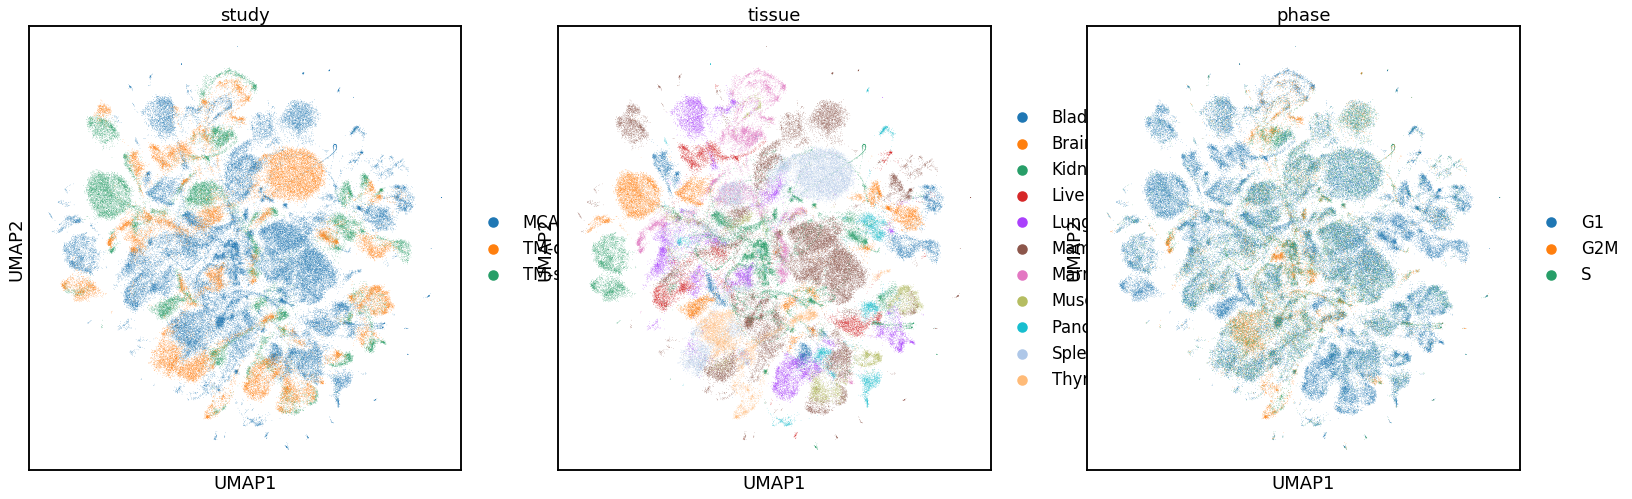

In [56]:
sc.pl.umap(bbknn, color=['study', 'tissue', 'phase'], palette = sc.pl.palettes.vega_20_scanpy)

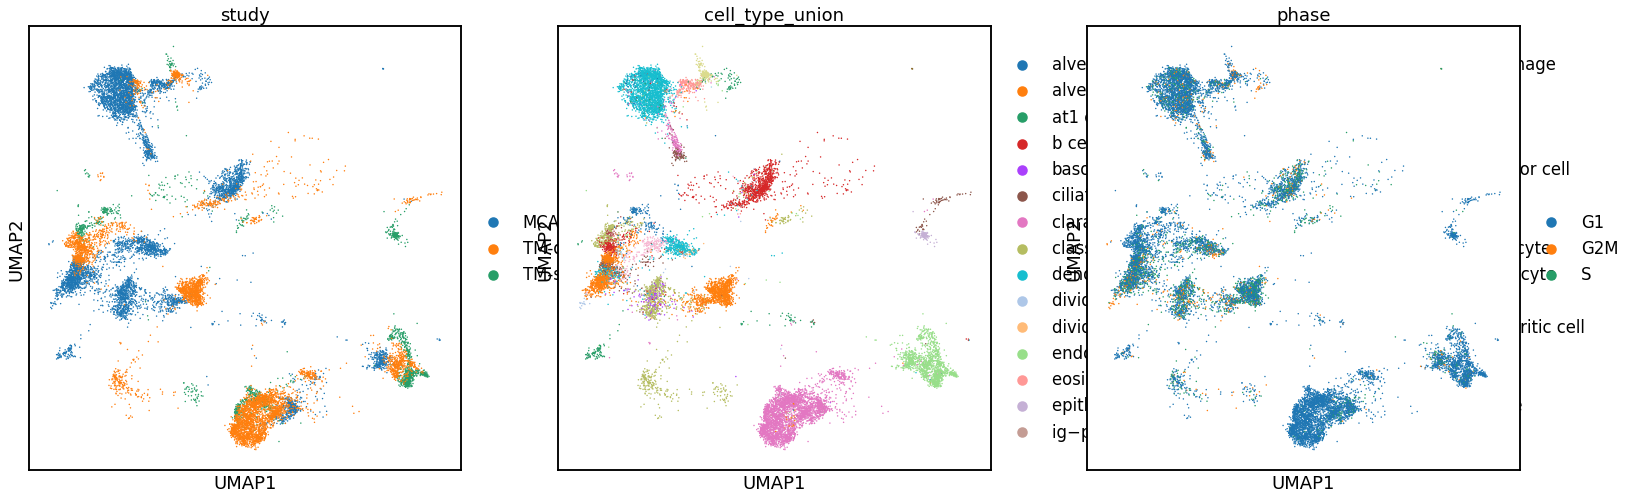

In [57]:
sc.pl.umap(bbknn[bbknn.obs.tissue == 'Lung'], color=['study', 'cell_type_union', 'phase'], palette=sc.pl.palettes.vega_20_scanpy)

## Seurat - expression matrix

In [8]:
seurat = sc.read(root+"/atlases_integrated/seurat.h5ad")

In [ ]:
scIB.pp.reduce_data(seurat, n_top_genes=None, use_rep='X_pca', pca=True, umap=True)

In [ ]:
seurat.write(root + "/atlases_analysis/seurat.h5ad")

In [72]:
seurat = sc.read(root + "/atlases_analysis/seurat.h5ad")

In [73]:
rename_mammary(seurat)
add_cc_scores(adata, seurat)

... storing 'tissue' as categorical
... storing 'phase' as categorical


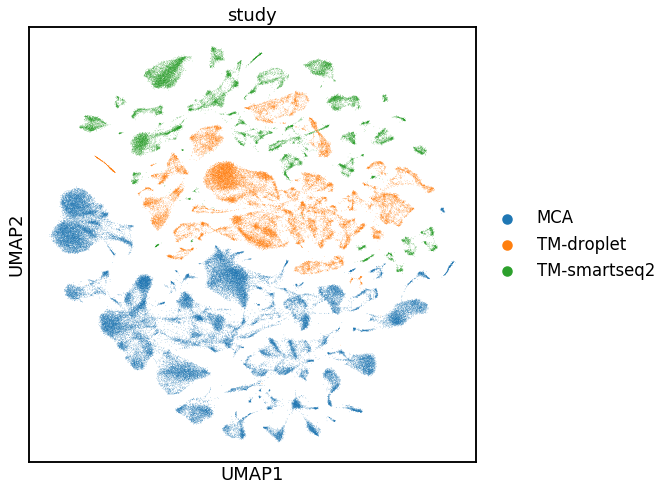

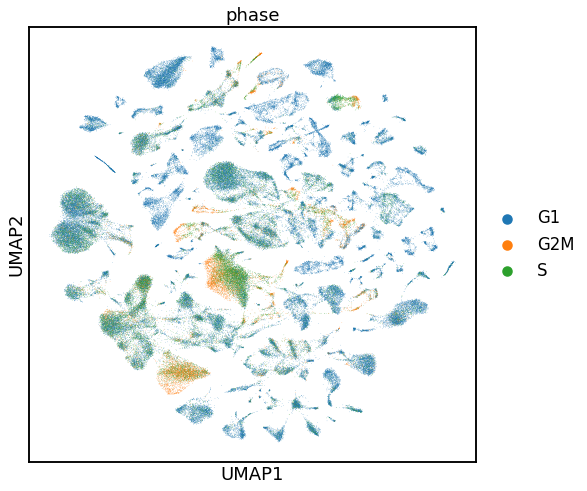

In [74]:
sc.pl.umap(seurat, color='study')
sc.pl.umap(seurat, color='phase')

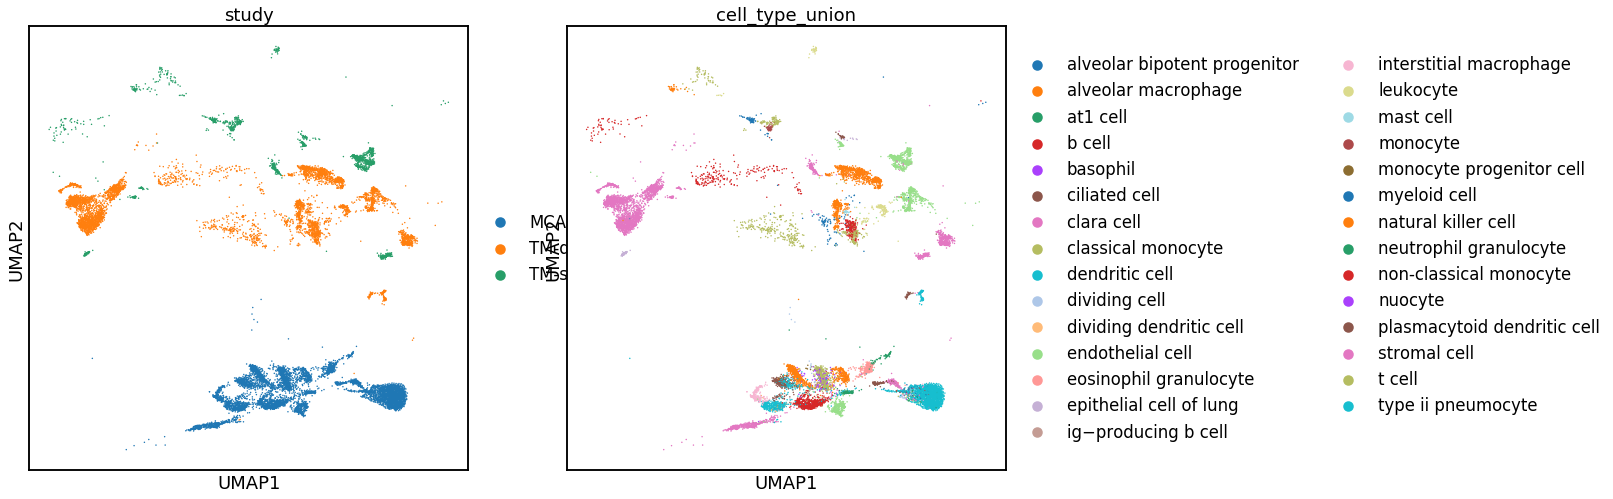

In [60]:
sc.pl.umap(seurat[seurat.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

## trVAE - embedding

In [9]:
trvae = sc.read(root+"/atlases_integrated/trvae.h5ad")

In [ ]:
scIB.pp.reduce_data(trvae, n_top_genes=None, use_rep='X_emb', pca=True, umap=True)

In [ ]:
trvae.write(root + "/atlases_analysis/trvae.h5ad")

In [65]:
trvae = sc.read(root + "/atlases_analysis/trvae.h5ad")

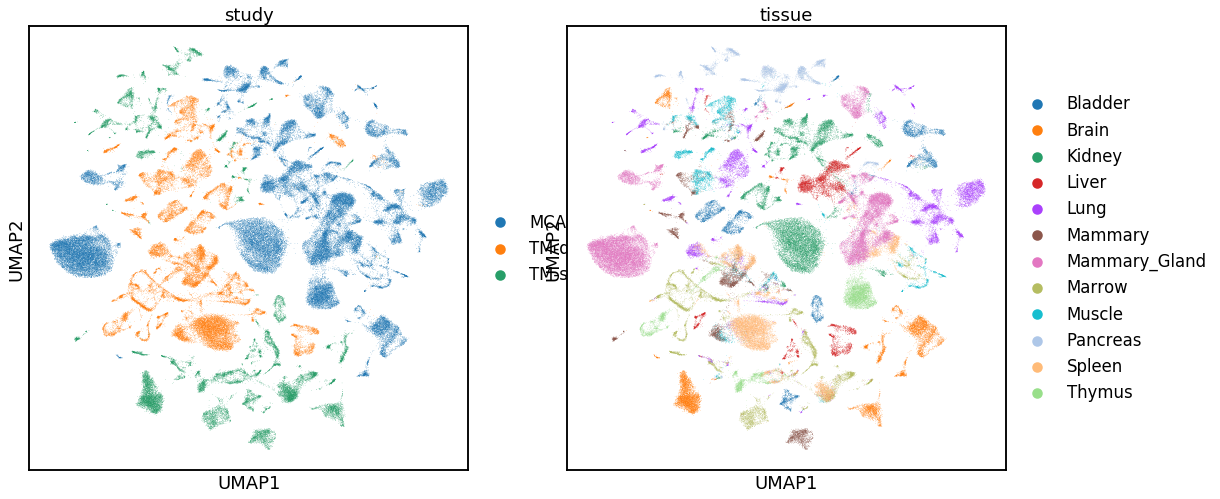

In [66]:
sc.pl.umap(trvae, color=['study', 'tissue'], palette = sc.pl.palettes.vega_20_scanpy)

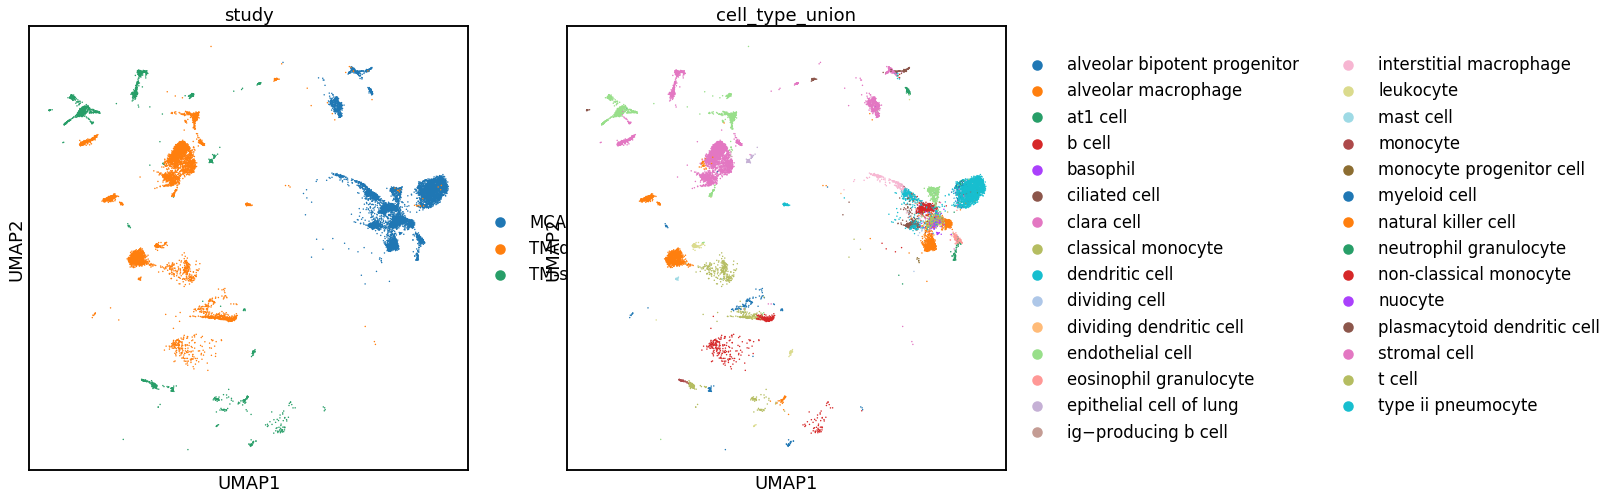

In [67]:
sc.pl.umap(trvae[trvae.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

## Harmony

In [75]:
harmony = sc.read(root+"/atlases_integrated/harmony.h5ad")

In [77]:
scIB.pp.reduce_data(harmony, n_top_genes=None, use_rep='X_emb', pca=True, umap=True)

PCA
Nearest Neigbours
UMAP


In [78]:
harmony.write(root + "/atlases_analysis/harmony.h5ad")

In [ ]:
harmony = sc.read(root + "/atlases_analysis/harmony.h5ad")

In [79]:
rename_mammary(harmony)
add_cc_scores(adata, harmony)

... storing 'tissue' as categorical
... storing 'phase' as categorical


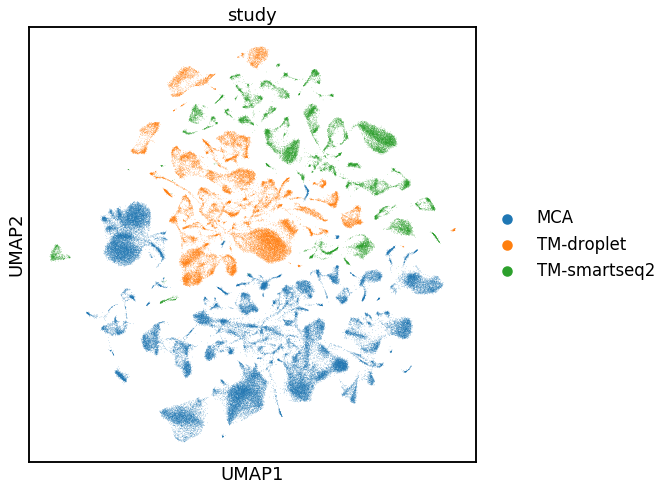

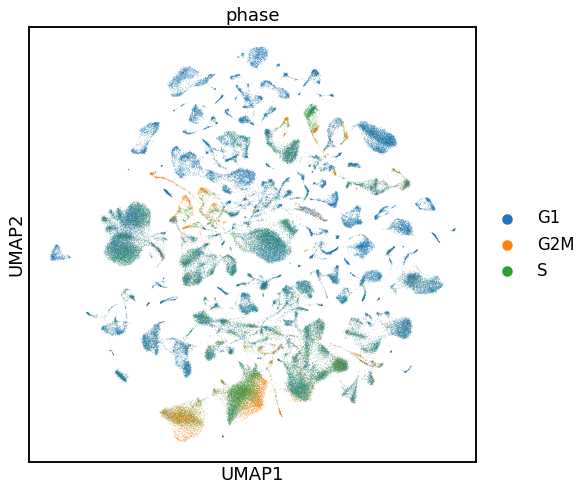

In [80]:
sc.pl.umap(harmony, color='study')
sc.pl.umap(harmony, color='phase')